In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_excel('../0_data/gold/8_data_model_LWIC_filtered.xlsx')
df.head()

,img_path,text_deep_clean,objectifies,skin,adj,Sixltr,Dic,percept,see,relativ,...,Authentic,verb,Clout,AllPunc,social,female,Comma,feel,drives,WC
0,../1_download_data/jacquemus\2022-05-30_15-43-...,jacquemus sydney hawai i night tom woman long ...,1,0.332761,7.69,30.77,84.62,15.38,15.38,30.77,...,94.81,7.69,77.92,0.00,7.69,7.69,0.00,0.00,0.0,13
1,../1_download_data/jacquemus\2020-11-12_17-00-...,jacquemus l annee fw shoot rosa picture woman ...,0,0.138254,16.67,13.89,86.11,25.00,22.22,13.89,...,1.79,8.33,79.76,5.56,8.33,8.33,5.56,2.78,0.0,36
2,../1_download_data/hm\2023-09-24_18-34-48_UTC\...,handbag hold close woman wear black dress blac...,1,0.002294,5.41,16.22,86.49,24.32,24.32,10.81,...,4.50,5.41,70.57,2.70,5.41,5.41,2.70,0.00,0.0,37
3,../1_download_data/jacquemus\2022-03-23_16-47-...,jacquemus le sac rond so happy have work iconi...,1,0.125818,0.00,21.74,82.61,26.09,17.39,13.04,...,9.25,4.35,66.81,8.70,8.70,8.70,4.35,8.70,0.0,23
4,../1_download_data/chanelofficial\2023-12-08_1...,chanelofficial opening chanel metier art show ...,0,0.145028,8.33,20.83,79.17,20.83,20.83,12.50,...,7.84,4.17,66.17,4.17,4.17,4.17,4.17,0.00,0.0,24


In [3]:
df.describe()

,objectifies,skin,adj,Sixltr,Dic,percept,see,relativ,space,function,...,Authentic,verb,Clout,AllPunc,social,female,Comma,feel,drives,WC
count,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,...,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000
mean,0.412098,0.228274,8.399647,17.463894,85.361909,19.979912,17.475772,15.456950,14.998488,43.876156,...,18.760353,5.228393,73.593963,6.096925,6.900365,6.083270,4.693132,1.574423,2.447498,30.496534
std,0.492368,0.213313,4.669839,4.874109,5.437738,4.990345,4.453235,5.507293,5.444888,4.316616,...,22.513286,3.118808,9.119266,4.337770,3.206366,2.305879,2.830453,1.936250,2.947700,5.843198
min,0.000000,0.000000,0.000000,5.560000,68.570000,5.710000,5.000000,2.860000,2.780000,27.270000,...,1.000000,0.000000,50.000000,0.000000,2.700000,2.700000,0.000000,0.000000,0.000000,10.000000
25%,0.000000,0.065017,5.410000,13.890000,81.480000,16.670000,14.290000,11.760000,11.430000,41.180000,...,2.400000,3.120000,66.170000,3.120000,4.350000,4.000000,2.940000,0.000000,0.000000,27.000000
50%,0.000000,0.159732,8.330000,17.140000,85.190000,20.000000,17.390000,15.150000,14.290000,43.750000,...,8.870000,4.550000,72.170000,5.000000,6.060000,5.710000,4.000000,0.000000,2.700000,32.000000
75%,1.000000,0.336554,11.430000,20.830000,88.890000,23.080000,20.590000,18.750000,18.180000,46.880000,...,26.550000,7.410000,79.760000,8.570000,8.570000,8.000000,5.880000,3.120000,3.700000,35.000000
max,1.000000,0.999600,22.580000,41.670000,100.000000,40.620000,35.000000,40.000000,40.000000,61.540000,...,99.000000,20.000000,99.000000,27.590000,30.000000,15.150000,26.670000,13.330000,26.670000,38.000000


In [4]:
numeric_columns = df.select_dtypes(include=['number']).columns

In [5]:
X = df[numeric_columns].drop(columns = 'objectifies').copy()
y = df['objectifies']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from xgboost import XGBClassifier

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

# Random Forest
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)

# Gradient Boosting
gboost = GradientBoostingClassifier()
gboost.fit(X_train, y_train)
gboost_pred = gboost.predict(X_test)

# Xtreme Gradient Boosting
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgboost_model.fit(X_train, y_train)
xgboost_pred = xgboost_model.predict(X_test)

# Example of evaluating the models using accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dtree_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rforest_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gboost_pred))
print("XGBoost Accuracy:", accuracy_score(y_test, xgboost_pred))

C:\Users\danie\anaconda3\envs\ds_master\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.59958071278826
KNN Accuracy: 0.6289308176100629
SVM Accuracy: 0.5911949685534591
Decision Tree Accuracy: 0.559748427672956
Random Forest Accuracy: 0.6310272536687631
Gradient Boosting Accuracy: 0.59958071278826
XGBoost Accuracy: 0.5953878406708596


In [30]:
l_acc1 =  accuracy_score(y_test, logreg_pred)
knn_acc1 = accuracy_score(y_test, knn_pred)
svm_acc1 =  accuracy_score(y_test, svm_pred)
dt_acc1 = accuracy_score(y_test, dtree_pred)
rf_acc1 =  accuracy_score(y_test, rforest_pred)
gb_acc1 = accuracy_score(y_test, gboost_pred)
xgboost_acc1= accuracy_score(y_test, xgboost_pred)

## Use Word Embeddings

In [6]:
import numpy as np
import pandas as pd
from gensim.models import KeyedVectors
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

C:\Users\danie\anaconda3\envs\ds_master\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Download the Word2Vec Embeddings and save them locally. Not in this folder because github does not support large files in the free trial
GoogleNews-vectors-negative300.bin
path to download = https://www.kaggle.com/datasets/leadbest/googlenewsvectorsnegative300

In [7]:
model = KeyedVectors.load_word2vec_format('../../../Embeddings/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin', binary=True) # have embeddings in pc

In [8]:
def sentence_to_avg_vector(sentence, model):
    words = word_tokenize(sentence.lower())
    word_vectors = [model[word] for word in words if word in model]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    else:
        return np.mean(word_vectors, axis=0)

In [9]:
df['sentence_vector'] = df['text_deep_clean'].apply(lambda x: sentence_to_avg_vector(x, model))
# Assuming you want to use these vectors in a machine learning model
X_embeddings = np.array(df['sentence_vector'].tolist())  # Feature matrix

In [35]:
X_combined = np.concatenate((X_embeddings, X), axis=1)
X_combined

array([[-1.28784180e-02,  4.12375703e-02, -8.36736523e-03, ...,
         0.00000000e+00,  0.00000000e+00,  1.30000000e+01],
       [ 1.17519209e-02, -1.64370332e-02,  9.43523925e-03, ...,
         2.78000000e+00,  0.00000000e+00,  3.60000000e+01],
       [ 3.10849268e-02,  3.15718213e-03, -4.59345020e-02, ...,
         0.00000000e+00,  0.00000000e+00,  3.70000000e+01],
       ...,
       [-1.88683402e-02, -4.65901708e-03, -2.67808698e-02, ...,
         0.00000000e+00,  0.00000000e+00,  2.90000000e+01],
       [-2.45157885e-03,  7.34268203e-02, -1.33702597e-02, ...,
         2.86000000e+00,  0.00000000e+00,  3.50000000e+01],
       [ 3.72042656e-02, -1.88064575e-03, -3.41339111e-02, ...,
         3.12000000e+00,  6.25000000e+00,  3.20000000e+01]])

# Classificator with embeddings

In [36]:
X = df[numeric_columns].drop(columns = 'objectifies').copy()
y = df['objectifies']
model  = KeyedVectors.load_word2vec_format('../../../Embeddings/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin', binary=True) # have embeddings in pc
def sentence_to_avg_vector(sentence, model):
    words = word_tokenize(sentence.lower())
    word_vectors = [model[word] for word in words if word in model]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    else:
        return np.mean(word_vectors, axis=0)
df['sentence_vector'] = df['text_deep_clean'].apply(lambda x: sentence_to_avg_vector(x, model))
# Assuming you want to use these vectors in a machine learning model
X_embeddings = np.array(df['sentence_vector'].tolist())  # Feature matrix
X_combined = np.concatenate((X_embeddings, X), axis=1)
X_combined

X0 = X_combined
Y = df['objectifies']
X_train, X_test, Y_train, Y_test = train_test_split(X0, Y, test_size=0.3, random_state=42)

In [37]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

# Random Forest
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)

# Gradient Boosting
gboost = GradientBoostingClassifier()
gboost.fit(X_train, y_train)
gboost_pred = gboost.predict(X_test)

# Xtreme Gradient Boosting
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgboost_model.fit(X_train, y_train)
xgboost_pred = xgboost_model.predict(X_test)

# Example of evaluating the models using accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dtree_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rforest_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gboost_pred))
print("XGBoost Accuracy:", accuracy_score(y_test, xgboost_pred))

C:\Users\danie\anaconda3\envs\ds_master\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.59958071278826
KNN Accuracy: 0.6310272536687631
SVM Accuracy: 0.5849056603773585
Decision Tree Accuracy: 0.5911949685534591
Random Forest Accuracy: 0.6624737945492662
Gradient Boosting Accuracy: 0.70020964360587
XGBoost Accuracy: 0.6876310272536688


In [38]:
l_acc2 =  accuracy_score(y_test, logreg_pred)
knn_acc2 = accuracy_score(y_test, knn_pred)
svm_acc2 =  accuracy_score(y_test, svm_pred)
dt_acc2 = accuracy_score(y_test, dtree_pred)
rf_acc2 =  accuracy_score(y_test, rforest_pred)
gb_acc2 = accuracy_score(y_test, gboost_pred)
xgboost_acc2 = accuracy_score(y_test, xgboost_pred)

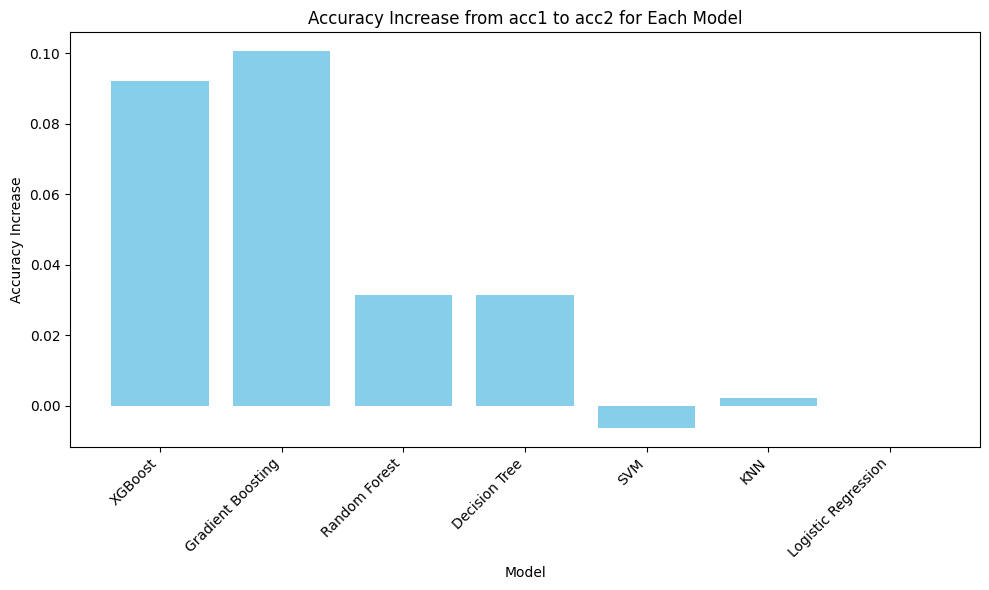

In [39]:
import matplotlib.pyplot as plt

# Assuming the accuracy scores for acc1 and acc2 might actually be different
# For demonstration, acc2 values are identical to acc1; replace with actual acc2 values if they're different

# Calculate the increase from acc1 to acc2 for each model
increases = [
    xgboost_acc2 - xgboost_acc1,
    gb_acc2 - gb_acc1,
    rf_acc2 - rf_acc1,
    dt_acc2 - dt_acc1,
    svm_acc2 - svm_acc1,
    knn_acc2 - knn_acc1,
    l_acc2 - l_acc1
]

model_names = ['XGBoost', 'Gradient Boosting', 'Random Forest', 'Decision Tree', 'SVM', 'KNN', 'Logistic Regression']

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, increases, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy Increase')
plt.title('Accuracy Increase from acc1 to acc2 for Each Model')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()  # Adjusts subplot params for the subplot(s) to fit in to the figure area

# Show the plot
plt.show()

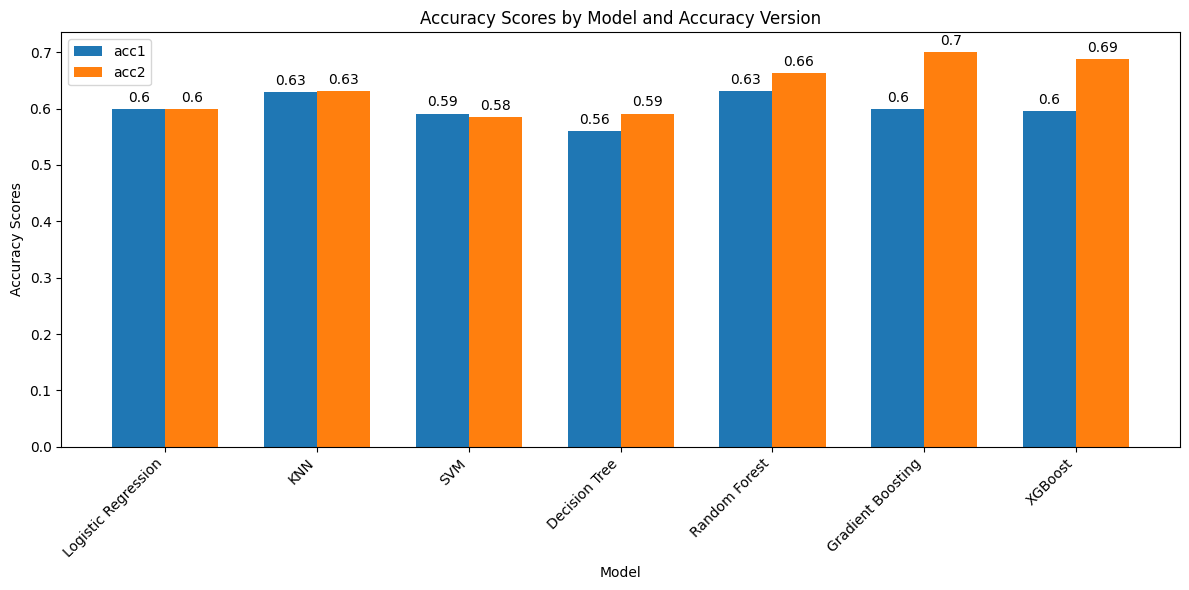

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define the model names
model_names = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']

# Gather acc1 and acc2 scores into lists for plotting
acc1_scores = [l_acc1, knn_acc1, svm_acc1, dt_acc1, rf_acc1, gb_acc1, xgboost_acc1]
acc2_scores = [l_acc2, knn_acc2, svm_acc2, dt_acc2, rf_acc2, gb_acc2, xgboost_acc2]

# Set the positions and width for the bars
positions = np.arange(len(model_names))
width = 0.35  # the width of the bars

# Plotting both acc1 and acc2 scores
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(positions - width/2, acc1_scores, width, label='acc1')
rects2 = ax.bar(positions + width/2, acc2_scores, width, label='acc2')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy Scores')
ax.set_title('Accuracy Scores by Model and Accuracy Version')
ax.set_xticks(positions)
ax.set_xticklabels(model_names, rotation=45, ha="right")
ax.legend()

# Function to attach a label above each bar, showing its height
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to attach the labels
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [41]:
y.mean()

0.4120982986767486

See also F1-score to evaluate best model because dataset is unbalanced

In [43]:
from sklearn.metrics import f1_score

# Calculate F1 scores
f1_logreg = f1_score(y_test, logreg_pred)
f1_knn = f1_score(y_test, knn_pred)
f1_svm = f1_score(y_test, svm_pred)
f1_dtree = f1_score(y_test, dtree_pred)
f1_rforest = f1_score(y_test, rforest_pred)
f1_gboost = f1_score(y_test, gboost_pred)
f1_xgboost = f1_score(y_test, xgboost_pred)

# Print F1 scores
print("Logistic Regression F1 Score:", f1_logreg)
print("KNN F1 Score:", f1_knn)
print("SVM F1 Score:", f1_svm)
print("Decision Tree F1 Score:", f1_dtree)
print("Random Forest F1 Score:", f1_rforest)
print("Gradient Boosting F1 Score:", f1_gboost)
print("XGradient Boosting F1 Score:", f1_xgboost)

Logistic Regression F1 Score: 0.4365781710914454
KNN F1 Score: 0.5111111111111112
SVM F1 Score: 0.0
Decision Tree F1 Score: 0.5112781954887218
Random Forest F1 Score: 0.5076452599388379
Gradient Boosting F1 Score: 0.594900849858357
XGradient Boosting F1 Score: 0.5802816901408451


Having the best model we can automatically label all the other data

# See feature importance on objectification

In [44]:
X.columns

Index(['skin', 'adj', 'Sixltr', 'Dic', 'percept', 'see', 'relativ', 'space',
       'function', 'bio', 'body', 'article', 'prep', 'conj', 'face',
       'Authentic', 'verb', 'Clout', 'AllPunc', 'social', 'female', 'Comma',
       'feel', 'drives', 'WC'],
      dtype='object')

In [45]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors
from nltk.tokenize import word_tokenize


# Gradient Boosting
gboost = GradientBoostingClassifier()
gboost.fit(X_train, y_train)
gboost_pred = gboost.predict(X_test)


# Extract feature importances
feature_importances = xgboost_model.feature_importances_

# Combine word embedding feature names with 'skin' and 'face'
word_embedding_feature_names = ['word_embedding_' + str(i) for i in range(X_embeddings.shape[1])]
other_feature_names = ['skin', 'adj', 'Sixltr', 'Dic', 'percept', 'see', 'relativ', 'space',
       'function', 'bio', 'body', 'article', 'prep', 'conj', 'face',
       'Authentic', 'verb', 'Clout', 'AllPunc', 'social', 'female', 'Comma',
       'feel', 'drives', 'WC']
feature_names = word_embedding_feature_names + other_feature_names

# Pair feature names with their importances
features = dict(zip(feature_names, feature_importances))
sorted_features = sorted(features.items(), key=lambda x: x[1], reverse=True)

# Displaying feature importances
for feature, importance in sorted_features:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: word_embedding_82, Importance: 0.024113457649946213
Feature: word_embedding_13, Importance: 0.017740368843078613
Feature: word_embedding_198, Importance: 0.01563941314816475
Feature: word_embedding_114, Importance: 0.011732355691492558
Feature: word_embedding_284, Importance: 0.011593455448746681
Feature: word_embedding_191, Importance: 0.011519678868353367
Feature: word_embedding_267, Importance: 0.011336554773151875
Feature: word_embedding_133, Importance: 0.010250293649733067
Feature: word_embedding_32, Importance: 0.010205714963376522
Feature: word_embedding_107, Importance: 0.010112588293850422
Feature: word_embedding_48, Importance: 0.009962476789951324
Feature: word_embedding_38, Importance: 0.009949743747711182
Feature: word_embedding_287, Importance: 0.009908782318234444
Feature: word_embedding_94, Importance: 0.009761146269738674
Feature: face, Importance: 0.009514577686786652
Feature: word_embedding_92, Importance: 0.009344803169369698
Feature: word_embedding_66, Im

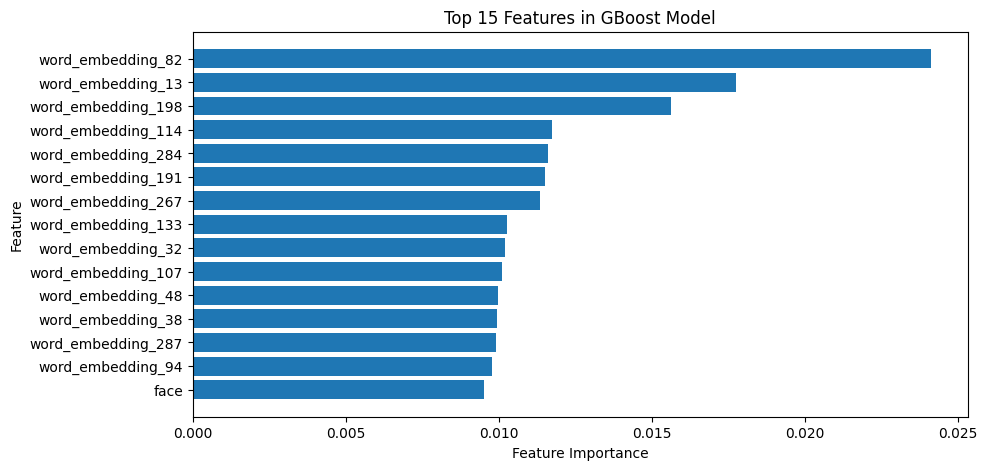

In [46]:
# Select the top 15 features
top_features = sorted_features[:15]

# Unzip the feature names and their importances
top_feature_names, top_importances = zip(*top_features)

# Create the bar plot
plt.figure(figsize=(10, 5))
plt.barh(range(len(top_feature_names)), top_importances, align='center')
plt.yticks(range(len(top_feature_names)), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 15 Features in GBoost Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


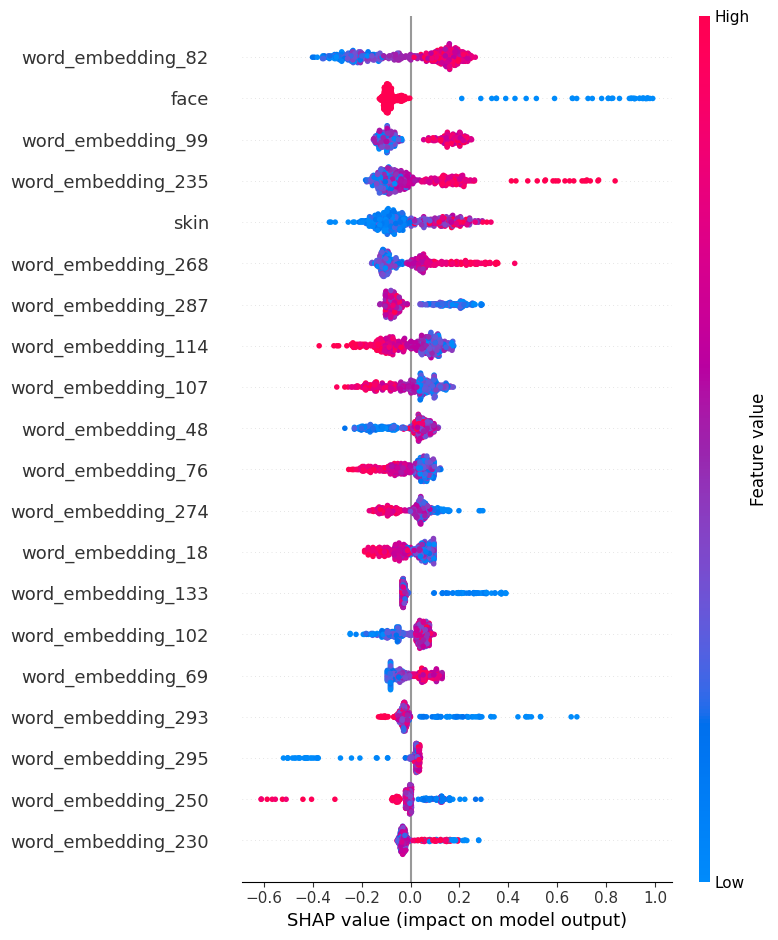

In [47]:
import shap  # Ensure SHAP is installed

# Initialize the SHAP Explainer
explainer = shap.TreeExplainer(gboost)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot for all features
# shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_names)

# Detailed summary plot that shows the impact of each feature on model output
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

# For individual predictions, we can use a force plot. Here's how for the first sample in the test set:
#shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], feature_names=feature_names)

For model interpretability, especially in the context of feature importance from a model like XGBoost, we are limited to understanding the importance of the entire word embedding as a feature, not its individual dimensions. Each dimension of the embedding contributes to the overall meaning of the word in a way that's intertwined with all other dimensions, making it difficult to assign specific meaning or importance to individual dimensions.

But seeing that embeddings contribute to the classification task, shows that the content of the shows 8 embeddings that are more relevant that the fact of face or not in a picture for example, showing great promissing in a greater dataset

In [48]:
# Choose a target word
target_word = "leg"  # replace with your target word

# Find most similar words
most_similar_words = model.most_similar(target_word, topn=10)

for word, similarity in most_similar_words:
    print(f"Word: {word}, Similarity: {similarity}")

Word: thigh, Similarity: 0.6789047718048096
Word: legs, Similarity: 0.6698594093322754
Word: ankle, Similarity: 0.651005744934082
Word: shin, Similarity: 0.6278131604194641
Word: forearm, Similarity: 0.627385675907135
Word: knee, Similarity: 0.613674521446228
Word: collar_bone, Similarity: 0.6121348738670349
Word: puncturing_lung, Similarity: 0.6104021668434143
Word: collarbone, Similarity: 0.6058264970779419
Word: fibula, Similarity: 0.6012815833091736


In [49]:
from nltk.tokenize import word_tokenize

# Sample DataFrame
# df = pd.DataFrame({'text_deep_clean': ['your sentences here', 'more sentences']})

# Tokenize each sentence and get unique words
unique_words = set()
for sentence in df['text_deep_clean']:
    words = word_tokenize(sentence)
    unique_words.update(words)

# Convert set to list if you need a list
unique_word_list = list(unique_words)
words_to_compare = unique_word_list
# unique_word_list now contains all unique words from your sentences


In [50]:
def cosine(vector1, vector2):
  """Calculates the cosine similarity between two vectors."""

  # Ensure both vectors have the same dimension
  assert vector1.shape == vector2.shape, "Vectors must have the same dimension"

  # Calculate the dot product of the vectors
  dot_product = np.dot(vector1, vector2)

  # Calculate the magnitudes of the vectors
  magnitude1 = np.linalg.norm(vector1)
  magnitude2 = np.linalg.norm(vector2)

  # Ensure magnitudes are not zero to avoid division by zero
  assert magnitude1 != 0 and magnitude2 != 0, "Vector magnitudes cannot be zero"

  # Calculate the cosine similarity
  cosine_similarity = dot_product / (magnitude1 * magnitude2)

  return cosine_similarity

In [51]:
# First, let's identify the top 10 features that are word embeddings
top_word_embedding_indices = [int(feature.split('_')[-1]) for feature, importance in sorted_features[:10] if 'word_embedding_' in feature]
# Calculate the average vector across the top features

average_vector = np.zeros(model.vector_size)  # Initialize a zero vector of the same size as the word vectors

# Calculate the average for each top feature
for index in top_word_embedding_indices:
    # Summing up all the vectors corresponding to this dimension
    average_vector += np.mean(X_embeddings[:, index])

# Normalize the average vector
average_vector /= len(top_word_embedding_indices)

# Compute cosine similarity for each word in your list
similarities = {}
for word in words_to_compare:
    if word in model:
        word_vector = model[word]
        similarity = 1 - cosine(average_vector, word_vector)
        similarities[word] = similarity

# Sort and display the words based on similarity
sorted_words = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
for word, similarity in sorted_words:
    print(f"Word: {word}, Similarity: {similarity}")

Word: firework, Similarity: 1.1915013710025424
Word: ingredient, Similarity: 1.1914751824219927
Word: ton, Similarity: 1.1806343302594413
Word: app, Similarity: 1.1774360032051063
Word: tree, Similarity: 1.170372786095092
Word: span, Similarity: 1.1656131434407009
Word: fuse, Similarity: 1.16557171370309
Word: diverse, Similarity: 1.1653749097135861
Word: belt, Similarity: 1.165240120443127
Word: building, Similarity: 1.1645730336108575
Word: variety, Similarity: 1.1640252694837379
Word: place, Similarity: 1.1638934578391267
Word: craft, Similarity: 1.1612413205098715
Word: essential, Similarity: 1.1598163349970185
Word: sim, Similarity: 1.1596639750879003
Word: top, Similarity: 1.1589404552946545
Word: metal, Similarity: 1.1580008052543405
Word: steel, Similarity: 1.1577359447815407
Word: parachute, Similarity: 1.1539396777478848
Word: chapa, Similarity: 1.1525139566930125
Word: bulb, Similarity: 1.15249238842629
Word: cup, Similarity: 1.1506450425609998
Word: ring, Similarity: 1.1490

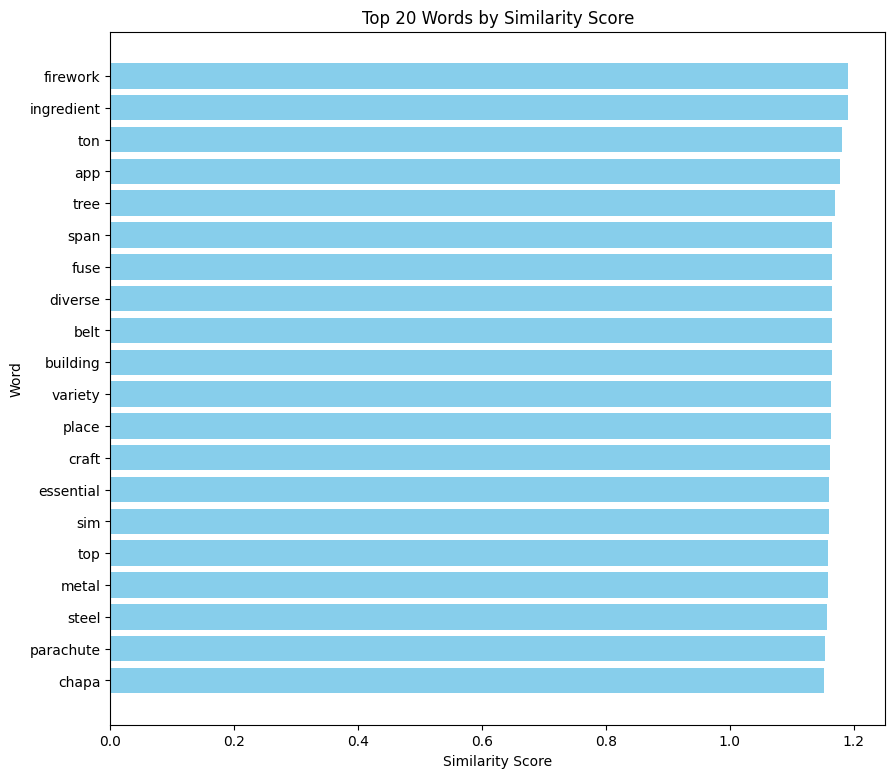

In [55]:
import matplotlib.pyplot as plt

# Assuming `sorted_words` contains your sorted words and their similarity scores

# Take the top 20 words and their scores
top_20_words_and_scores = sorted_words[:20]

# Unpack the words and their scores into two lists
words, scores = zip(*top_20_words_and_scores)

# Create a horizontal bar plot
plt.figure(figsize=(10, 9))
plt.barh(words, scores, color='skyblue')
plt.xlabel('Similarity Score')
plt.ylabel('Word')
plt.title('Top 20 Words by Similarity Score')
plt.gca().invert_yaxis()  # Invert the y-axis so the highest score is at the top
plt.show()

This is a shallow approxmation of what we could see as words that objectify the body of women as described by the BLIP model captioning